In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
input_path = 'D:/Codes/Data/SantanderProductRecommendation/'
limit_row = 1000000
df = pd.read_csv(input_path + 'train_ver2.csv', dtype={'sexo':str, 'ind_nuevo':str, 'ult_fec_cli_1t':str, 'indext':str}, nrows=limit_row)
df.head()

c:\python34\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
unique_id = pd.Series(df['ncodpers'].unique())
unique_ids = unique_id.sample(n=15000)
df = df[df.ncodpers.isin(unique_ids)]
df.describe()

,ncodpers,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,2.407500e+04,23844.000000,23844.000000,23844.0,23671.000000,23844.000000,1.976500e+04,24075.000000,24075.0,24075.000000,...,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,23957.000000,23957.000000,24075.000000
mean,6.855211e+05,1.106861,1.000084,1.0,26.852266,0.572513,1.392955e+05,0.000249,0.0,0.754351,...,0.009180,0.013790,0.005358,0.071693,0.066044,0.039045,0.006438,0.071169,0.078683,0.165607
std,4.041841e+05,3.234412,0.012952,0.0,12.303634,0.494724,2.076594e+05,0.015785,0.0,0.430480,...,0.095372,0.116622,0.073005,0.257984,0.248363,0.193705,0.079981,0.257113,0.269248,0.371736
min,1.592100e+04,1.000000,1.000000,1.0,1.000000,0.000000,7.965000e+03,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.307520e+05,1.000000,1.000000,1.0,18.000000,0.000000,7.281177e+04,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.541340e+05,1.000000,1.000000,1.0,28.000000,1.000000,1.088972e+05,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.070936e+06,1.000000,1.000000,1.0,33.000000,1.000000,1.646092e+05,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.379131e+06,99.000000,3.000000,1.0,52.000000,1.000000,1.326862e+07,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [5]:
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'], format='%Y-%m-%d')
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], format='%Y-%m-%d')
df['fecha_dato'].unique()
df['fecha_alta'].unique()

array(['2012-08-10T00:00:00.000000000', '2012-08-16T00:00:00.000000000',
       '2012-08-13T00:00:00.000000000', ...,
       '1995-06-29T00:00:00.000000000', '2015-02-13T00:00:00.000000000',
       '2015-02-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

In [7]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

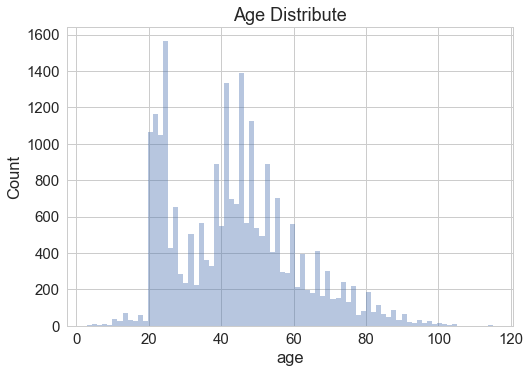

In [8]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df['age'].dropna(), bins=80, kde=False)
    sns.plt.title('Age Distribute')
    plt.ylabel('Count')

In [9]:
df.loc[df.age<18, 'age'] = df.loc[(df.age>=18) & (df.age<=30), 'age'].mean(skipna=True)
df.loc[df.age>100, 'age'] = df.loc[(df.age>30) & (df.age<100), 'age'].mean(skipna=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['age'] = df['age'].astype(int)

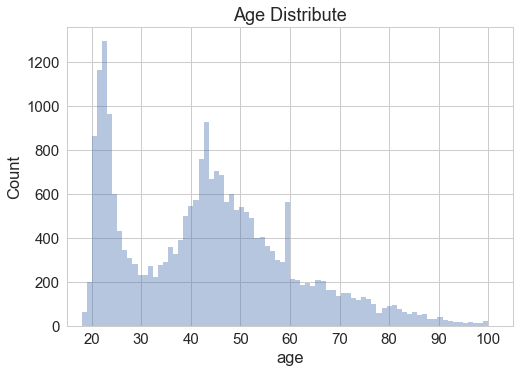

In [10]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style('whitegrid')
    sns.distplot(df['age'], bins=80, kde=False)
    sns.plt.title('Age Distribute')
    plt.ylabel('Count')
    plt.xlim(15, 105)

In [11]:
df.columns
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [12]:
df['ind_nuevo'].isnull().sum()
months_active = df.loc[df['ind_nuevo'].isnull(), :].groupby('ncodpers', sort=False).size()
len(months_active)
months_active.max()
df.loc[df['ind_nuevo'].isnull(), 'ind_nuevo'] = 1

In [13]:
df['antiguedad'].isnull().sum()

0

In [14]:
df.antiguedad = pd.to_numeric(df.antiguedad, errors="coerce")

In [15]:
df.antiguedad.isnull().sum()

231

In [16]:
df.loc[df['antiguedad'].isnull(), "ind_nuevo"].describe()
df.loc[df.antiguedad < 0, 'antiguedad'] = 0
df.loc[df['antiguedad'].isnull(), 'antiguedad'] = df.antiguedad.min()
df.antiguedad.describe()

count    24075.000000
mean        96.805691
std         66.283148
min          0.000000
25%         32.000000
50%         97.000000
75%        157.000000
max        246.000000
Name: antiguedad, dtype: float64

In [17]:
dates = df.loc[:, 'fecha_alta'].sort_values().reset_index()
median_dates = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(), 'fecha_alta'] = dates.loc[median_dates, 'fecha_alta']
dates.isnull().sum()

index           0
fecha_alta    231
dtype: int64

In [18]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month'],
      dtype='object')

In [19]:
pd.Series([i for i in df.indrel]).value_counts()

1.0     23818
99.0       26
dtype: int64

In [20]:
df['indrel'].isnull().sum()
df.loc[df.indrel.isnull(), 'indrel'] = 1
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [21]:
df.drop(['tipodom','cod_prov'], axis=1, inplace=True)

In [22]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [23]:
'''
df.ind_actividad_cliente.value_counts()
df.loc[df.ind_actividad_cliente == 1, 'ind_actividad_cliente'] = 2
df.ind_actividad_cliente.value_counts()
df.loc[df.ind_actividad_cliente.isnull(), 'ind_actividad_cliente'] = 1
df.ind_actividad_cliente.value_counts()
'''
df.ind_actividad_cliente.value_counts()
df.ind_actividad_cliente.isnull().sum()
df.loc[df.ind_actividad_cliente.isnull(), 'ind_actividad_cliente'] = df.ind_actividad_cliente.median()

In [24]:
df.nomprov.unique()

array(['SEGOVIA', 'TOLEDO', 'CORUÑA, A', 'VALENCIA', 'AVILA', 'ALMERIA',
       'CACERES', 'ALICANTE', 'ZARAGOZA', 'MADRID', 'BARCELONA', 'MURCIA',
       'JAEN', 'CORDOBA', 'GIRONA', 'LERIDA', 'OURENSE', 'HUESCA',
       'PONTEVEDRA', 'VALLADOLID', 'CASTELLON', 'CIUDAD REAL', 'RIOJA, LA',
       'GUADALAJARA', 'ASTURIAS', 'LUGO', 'SEVILLA', 'ZAMORA', 'CADIZ',
       'SALAMANCA', 'TERUEL', 'MALAGA', 'NAVARRA', 'BADAJOZ', 'BIZKAIA',
       'PALMAS, LAS', 'ALBACETE', 'GRANADA', 'CANTABRIA', 'HUELVA',
       'BURGOS', 'LEON', 'PALENCIA', 'BALEARS, ILLES', 'CUENCA', 'ALAVA',
       'SORIA', nan, 'SANTA CRUZ DE TENERIFE', 'TARRAGONA', 'GIPUZKOA',
       'CEUTA', 'MELILLA'], dtype=object)

In [25]:
df.loc[df.nomprov=='CORUÑA, A', 'nomprov'] = 'CORUNA, A'
df.nomprov.unique()

array(['SEGOVIA', 'TOLEDO', 'CORUNA, A', 'VALENCIA', 'AVILA', 'ALMERIA',
       'CACERES', 'ALICANTE', 'ZARAGOZA', 'MADRID', 'BARCELONA', 'MURCIA',
       'JAEN', 'CORDOBA', 'GIRONA', 'LERIDA', 'OURENSE', 'HUESCA',
       'PONTEVEDRA', 'VALLADOLID', 'CASTELLON', 'CIUDAD REAL', 'RIOJA, LA',
       'GUADALAJARA', 'ASTURIAS', 'LUGO', 'SEVILLA', 'ZAMORA', 'CADIZ',
       'SALAMANCA', 'TERUEL', 'MALAGA', 'NAVARRA', 'BADAJOZ', 'BIZKAIA',
       'PALMAS, LAS', 'ALBACETE', 'GRANADA', 'CANTABRIA', 'HUELVA',
       'BURGOS', 'LEON', 'PALENCIA', 'BALEARS, ILLES', 'CUENCA', 'ALAVA',
       'SORIA', nan, 'SANTA CRUZ DE TENERIFE', 'TARRAGONA', 'GIPUZKOA',
       'CEUTA', 'MELILLA'], dtype=object)

In [26]:
df.loc[df.nomprov.isnull(), 'nomprov'] = 'UNKNOWN'
len(df.nomprov.unique())

53

In [27]:
df.renta.isnull().sum()

4310

In [28]:
incomes = df.loc[df.renta.notnull(), ['nomprov', 'renta']].groupby("nomprov").agg({"renta":median})

In [30]:
incomes

,renta
nomprov,
ALBACETE,80495.580
ALICANTE,70692.120
ALMERIA,90168.540
ASTURIAS,92109.660
AVILA,72013.380
BADAJOZ,65104.470
"BALEARS, ILLES",133145.850
BARCELONA,140039.580
BURGOS,88314.000


In [31]:
incomes.sort_values(by=("renta"), inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category",categories=[i for i in df.nomprov.unique()], ordered=False)
incomes.head()

,nomprov,renta
0,LERIDA,61344.33
1,CASTELLON,62360.28
2,CORDOBA,64156.38
3,BADAJOZ,65104.47
4,CUENCA,67153.86


([<matplotlib.axis.YTick at 0xae03c18>,
 <a list of 5 Text yticklabel objects>)

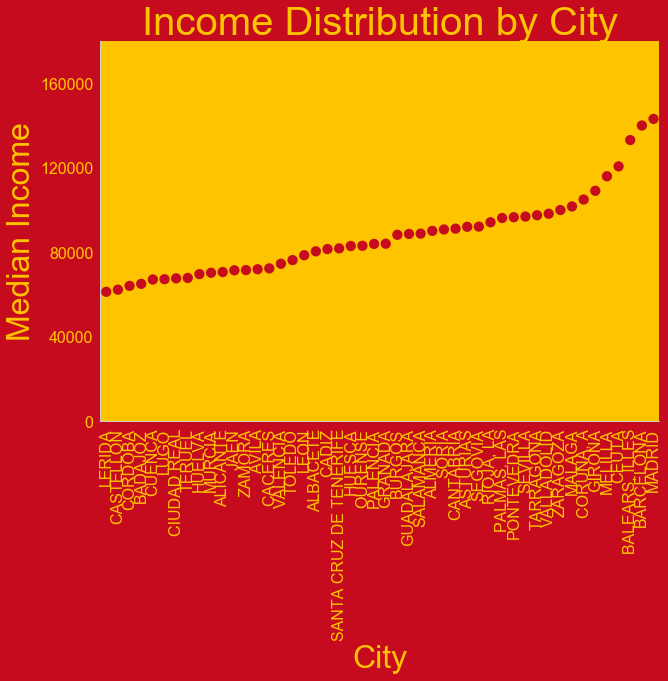

In [32]:
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   color="#c60b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16,labelcolor="#ffc400")
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("City",size=32,color="#ffc400")
plt.title("Income Distribution by City",size=40,color="#ffc400")
plt.ylim(0,180000)

plt.yticks(range(0,180000,40000))

In [33]:
grouped = df.groupby("nomprov").agg({"renta":lambda x : x.median(skipna=True)}).reset_index()
grouped

,nomprov,renta
0,ALAVA,NaN
1,ALBACETE,80495.580
2,ALICANTE,70692.120
3,ALMERIA,90168.540
4,ASTURIAS,92109.660
5,AVILA,72013.380
6,BADAJOZ,65104.470
7,"BALEARS, ILLES",133145.850
8,BARCELONA,140039.580
9,BIZKAIA,NaN


In [34]:
new_incomes = pd.merge(df, grouped, how='inner', on="nomprov").loc[:, ["nomprov", "renta_y"]]
new_incomes = new_incomes.rename(columns={'renta_y': 'renta'}).sort_values('renta').sort_values('nomprov')
new_incomes

,nomprov,renta
23195,ALAVA,NaN
23162,ALAVA,NaN
23161,ALAVA,NaN
23160,ALAVA,NaN
23159,ALAVA,NaN
23158,ALAVA,NaN
23157,ALAVA,NaN
23156,ALAVA,NaN
23155,ALAVA,NaN
23154,ALAVA,NaN


In [36]:
df.sort_values('nomprov', inplace=True)
df.nomprov.unique()

array(['ALAVA', 'ALBACETE', 'ALICANTE', 'ALMERIA', 'ASTURIAS', 'AVILA',
       'BADAJOZ', 'BALEARS, ILLES', 'BARCELONA', 'BIZKAIA', 'BURGOS',
       'CACERES', 'CADIZ', 'CANTABRIA', 'CASTELLON', 'CEUTA',
       'CIUDAD REAL', 'CORDOBA', 'CORUNA, A', 'CUENCA', 'GIPUZKOA',
       'GIRONA', 'GRANADA', 'GUADALAJARA', 'HUELVA', 'HUESCA', 'JAEN',
       'LEON', 'LERIDA', 'LUGO', 'MADRID', 'MALAGA', 'MELILLA', 'MURCIA',
       'NAVARRA', 'OURENSE', 'PALENCIA', 'PALMAS, LAS', 'PONTEVEDRA',
       'RIOJA, LA', 'SALAMANCA', 'SANTA CRUZ DE TENERIFE', 'SEGOVIA',
       'SEVILLA', 'SORIA', 'TARRAGONA', 'TERUEL', 'TOLEDO', 'UNKNOWN',
       'VALENCIA', 'VALLADOLID', 'ZAMORA', 'ZARAGOZA'], dtype=object)

In [37]:
new_incomes = new_incomes.reset_index()
new_incomes

,index,nomprov,renta
0,23195,ALAVA,NaN
1,23162,ALAVA,NaN
2,23161,ALAVA,NaN
3,23160,ALAVA,NaN
4,23159,ALAVA,NaN
5,23158,ALAVA,NaN
6,23157,ALAVA,NaN
7,23156,ALAVA,NaN
8,23155,ALAVA,NaN
9,23154,ALAVA,NaN


In [39]:
df = df.reset_index()
df

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
0,46677,2015-01-28,1102220,N,ES,H,24,2012-11-19,0,32.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,319163,2015-01-28,266303,N,ES,H,66,2001-08-01,0,168.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,410028,2015-01-28,101693,N,ES,V,68,1998-07-21,0,204.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,577375,2015-01-28,453506,N,ES,H,39,2004-01-16,0,138.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,925956,2015-02-28,301109,N,ES,V,62,2001-11-26,0,164.0,...,0,0,0,0,0,0,0.0,0.0,0,2
5,935705,2015-02-28,274027,N,ES,H,55,2001-09-24,0,166.0,...,0,0,0,0,0,0,0.0,0.0,0,2
6,378158,2015-01-28,318983,N,ES,V,46,2002-01-21,0,162.0,...,0,0,0,0,0,0,0.0,0.0,0,1
7,909135,2015-02-28,266303,N,ES,H,66,2001-08-01,0,168.0,...,0,0,0,0,0,0,0.0,0.0,0,2
8,854446,2015-02-28,81122,N,ES,V,54,1997-12-30,0,211.0,...,1,0,0,0,0,0,0.0,0.0,0,2
9,614204,2015-01-28,515486,N,ES,V,51,2005-02-02,0,125.0,...,0,0,0,1,0,0,1.0,1.0,1,1


In [40]:
df.loc[:, ['index', 'nomprov', 'renta']]

,index,nomprov,renta
0,46677,ALAVA,NaN
1,319163,ALAVA,NaN
2,410028,ALAVA,NaN
3,577375,ALAVA,NaN
4,925956,ALAVA,NaN
5,935705,ALAVA,NaN
6,378158,ALAVA,NaN
7,909135,ALAVA,NaN
8,854446,ALAVA,NaN
9,614204,ALAVA,NaN


In [41]:
df.loc[:, 'renta'].isnull().sum()

4310

In [43]:
new_incomes.loc[:, 'renta'].isnull().sum()

1194

In [48]:
new_incomes.loc[df.renta.isnull(), 'renta'].reset_index()

,index,renta
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [50]:
df.loc[df.renta.isnull(), 'renta'].reset_index()

,index,renta
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [51]:
df.columns

Index(['index', 'fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia',
       'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month'],
      dtype='object')

In [52]:
new_incomes.columns

Index(['index', 'nomprov', 'renta'], dtype='object')

In [53]:
df.loc[df.renta.isnull(), 'renta'] = new_incomes.loc[df.renta.isnull(), 'renta']

In [54]:
df.loc[:, ['renta']].isnull().sum()
#new_incomes.isnull().sum()

renta    1194
dtype: int64

In [55]:
df.loc[df.renta.isnull(), 'renta'] = df.loc[df.renta.notnull(), 'renta'].median()
df.renta.isnull().sum()

0

In [56]:
df.sort_values(by='fecha_dato', inplace=True)
df

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
0,46677,2015-01-28,1102220,N,ES,H,24,2012-11-19,0,32.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12257,501958,2015-01-28,675162,N,ES,H,28,2007-02-06,0,101.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12258,490972,2015-01-28,636597,N,ES,V,40,2006-08-24,0,107.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12259,56341,2015-01-28,1118034,N,ES,V,33,2013-01-14,0,30.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12260,483190,2015-01-28,739078,N,ES,H,38,2007-12-27,0,91.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12261,483201,2015-01-28,739004,N,ES,V,56,2007-12-27,0,91.0,...,1,0,0,0,0,0,0.0,0.0,0,1
12262,483215,2015-01-28,739087,N,ES,V,40,2007-12-27,0,91.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12263,483244,2015-01-28,738704,N,ES,V,54,2012-06-22,0,37.0,...,0,0,0,1,0,0,1.0,1.0,1,1
12264,62702,2015-01-28,1078903,N,ES,H,24,2012-10-10,0,33.0,...,0,0,0,0,0,0,0.0,0.0,0,1
12265,62546,2015-01-28,1079527,N,ES,V,35,2012-10-11,0,33.0,...,0,0,0,0,0,0,0.0,0.0,0,1


In [57]:
#df.isnull().any()
df.ind_nomina_ult1.isnull().sum()

118

In [58]:
df.ind_nom_pens_ult1.isnull().sum()

118

In [59]:
df.isnull().any()
df.ind_nomina_ult1.value_counts()

0.0    22252
1.0     1705
Name: ind_nomina_ult1, dtype: int64

In [60]:
df.ind_nom_pens_ult1.value_counts()

0.0    22072
1.0     1885
Name: ind_nom_pens_ult1, dtype: int64

In [61]:
#len(df)    126922
df.loc[df.ind_nomina_ult1.isnull(), 'ind_nomina_ult1'] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), 'ind_nom_pens_ult1'] = 0

In [62]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

In [63]:
df.dtypes

index                             int64
fecha_dato               datetime64[ns]
ncodpers                          int64
ind_empleado                     object
pais_residencia                  object
sexo                             object
age                               int32
fecha_alta               datetime64[ns]
ind_nuevo                        object
antiguedad                      float64
indrel                          float64
ult_fec_cli_1t                   object
indrel_1mes                     float64
tiprel_1mes                      object
indresi                          object
indext                           object
conyuemp                         object
canal_entrada                    object
indfall                          object
nomprov                          object
ind_actividad_cliente           float64
renta                           float64
segmento                         object
ind_ahor_fin_ult1                 int64
ind_aval_fin_ult1                 int64


In [64]:
string_data = df.select_dtypes(include=['object'])
missing_col = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_col:
    print('Unique values for {0}:\n{1}\n'.format(col, string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' nan 'B' 'F' 'A']

Unique values for pais_residencia:
['ES' nan 'DE' 'GN' 'BO' 'NO' 'BR' 'PY' 'AR' 'DO' 'CU' 'GB' 'IT' 'RO' 'SE'
 'NG' 'EC' 'UY' 'BG' 'MX' 'CO' 'CZ' 'FR' 'PE' 'AT' 'CH' 'VE' 'UA' 'DK' 'PL'
 'PT' 'BE' 'KH' 'IE' 'HR' 'BY' 'CA']

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-27' '2015-07-01' '2015-07-17' '2015-07-10' '2015-07-09'
 '2015-07-24' '2015-07-06' '2015-07-29' '2015-07-14' '2015-07-07']

Unique values for tiprel_1mes:
['I' 'A' nan 'P']

Unique values for indresi:
['S' nan 'N']

Unique values for indext:
['N' 'S' nan]

Unique values for conyuemp:
[nan 'N']

Unique values for canal_entrada:
['KHE' 'KAT' 'KFA' 'KFC' 'KAE' 'KAG' 'KBZ' 'KCC' 'KAR' 'KFD' 'KCH' 'KBH'
 'KCI' 'KAW' 'KHD' 'KAQ' 'KAA' '013' 'KFM' 'KAY' 'KBB' 'KGX' 'KEY' 'RED'
 'KBO' 'KES' 'KCA' 'KHK' 'KHL' 'KCD' 'KCG' 'KBW' 'KAS' 'KHF' 'KBU' 'KHN'
 'KEL' '007' 'KAM' 'KBQ' 'KBF' 'KCJ' 'KAF' 'KEO' 'KEZ' 'KAN' 'KBR' 'KDR'
 'KFT' 'KHC' 

In [65]:
df.tiprel_1mes.isnull().sum()
df.tiprel_1mes.value_counts()

A    13295
I    10548
P        1
Name: tiprel_1mes, dtype: int64

In [66]:
df.indfall.value_counts()

N    23774
S       70
Name: indfall, dtype: int64

In [67]:
df.loc[df.indfall.isnull(), 'indfall'] = 'N'

In [68]:
df.segmento.value_counts()

02 - PARTICULARES     16019
03 - UNIVERSITARIO     6402
01 - TOP               1422
Name: segmento, dtype: int64

In [69]:
df.loc[df.tiprel_1mes.isnull(), 'tiprel_1mes'] = 'A'
df.tiprel_1mes = df.tiprel_1mes.astype('category')
df.tiprel_1mes

0        I
12257    I
12258    I
12259    A
12260    A
12261    A
12262    I
12263    A
12264    I
12265    A
12266    I
12267    I
12268    I
12269    I
12270    I
12256    A
12271    A
12273    I
12274    A
12275    A
12276    A
12277    I
12278    A
12279    A
12280    I
12281    A
12282    A
12283    A
12284    A
12285    A
        ..
16541    A
16542    A
16543    A
16544    A
16545    A
16546    A
16547    A
16530    A
16466    I
16529    I
16527    A
16510    A
16511    A
16512    A
16513    I
16514    I
16515    I
16516    A
16517    I
16518    A
16519    A
16520    A
16521    A
16522    I
16523    A
16524    A
16525    A
16526    A
16528    I
16480    A
Name: tiprel_1mes, dtype: category
Categories (3, object): [A, I, P]

In [70]:
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

df.indrel_1mes.fillna("P",inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_col if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    df.loc[df[col].isnull(),col] = "UNKNOWN"

In [71]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

In [72]:
df.describe()

,index,ncodpers,age,antiguedad,indrel,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month
count,24075.000000,2.407500e+04,24075.000000,24075.000000,24075.000000,24075.000000,2.407500e+04,24075.000000,24075.0,24075.000000,...,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.00000,24075.000000,24075.000000,24075.000000
mean,503059.037965,6.855211e+05,43.610010,96.805691,1.105836,0.576615,1.330825e+05,0.000249,0.0,0.754351,...,0.013790,0.005358,0.071693,0.066044,0.039045,0.006438,0.07082,0.078297,0.165607,1.377902
std,287917.358839,4.041841e+05,16.808214,66.283148,3.218874,0.494106,1.889054e+05,0.015785,0.0,0.430480,...,0.116622,0.073005,0.257984,0.248363,0.193705,0.079981,0.25653,0.268644,0.371736,0.484873
min,35.000000,1.592100e+04,18.000000,0.000000,1.000000,0.000000,7.965000e+03,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,256223.500000,3.307520e+05,28.000000,32.000000,1.000000,0.000000,7.522308e+04,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,503384.000000,6.541340e+05,43.000000,97.000000,1.000000,1.000000,1.049928e+05,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,752702.000000,1.070936e+06,53.000000,157.000000,1.000000,1.000000,1.481518e+05,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
max,999975.000000,1.379131e+06,100.000000,246.000000,99.000000,1.000000,1.326862e+07,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


In [73]:
product_cols = df.iloc[:1, :].filter(regex="ind_+.*ult.*").columns.values
for col in product_cols:
    df[col] = df[col].astype(int)

In [75]:
df.dtypes

index                             int64
fecha_dato               datetime64[ns]
ncodpers                          int64
ind_empleado                     object
pais_residencia                  object
sexo                             object
age                               int32
fecha_alta               datetime64[ns]
ind_nuevo                        object
antiguedad                      float64
indrel                          float64
ult_fec_cli_1t                   object
indrel_1mes                    category
tiprel_1mes                    category
indresi                          object
indext                           object
conyuemp                         object
canal_entrada                    object
indfall                          object
nomprov                          object
ind_actividad_cliente           float64
renta                           float64
segmento                         object
ind_ahor_fin_ult1                 int32
ind_aval_fin_ult1                 int32


In [76]:
df.columns

Index(['index', 'fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia',
       'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1', 'month'],
      dtype='object')

In [83]:
#list(product_cols).append('d')
product_cols

array(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'], dtype=object)

In [79]:
def status_change(x):
    diff = x.diff().fillna(0)
    return ["Added" if i==1 else "Dropped" if i==-1 else "Maintained" for i in diff]

In [85]:
df.loc[:, product_cols] = df.loc[:, [col for col in product_cols] + ['ncodpers']].groupby('ncodpers').transform(status_change)

In [86]:
df = pd.melt(df, id_vars = [col for col in df.columns if col not in product_cols], value_vars= [col for col in product_cols])
df

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,conyuemp,canal_entrada,indfall,nomprov,ind_actividad_cliente,renta,segmento,month,variable,value
0,46677,2015-01-28,1102220,N,ES,H,24,2012-11-19,0,32.0,...,UNKNOWN,KHE,N,ALAVA,0.0,104992.80,03 - UNIVERSITARIO,1,ind_ahor_fin_ult1,Maintained
1,501958,2015-01-28,675162,N,ES,H,28,2007-02-06,0,101.0,...,UNKNOWN,KAT,N,MADRID,1.0,57946.02,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained
2,490972,2015-01-28,636597,N,ES,V,40,2006-08-24,0,107.0,...,UNKNOWN,KFA,N,MADRID,0.0,269449.65,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained
3,56341,2015-01-28,1118034,N,ES,V,33,2013-01-14,0,30.0,...,UNKNOWN,KFC,N,MADRID,1.0,145870.80,03 - UNIVERSITARIO,1,ind_ahor_fin_ult1,Maintained
4,483190,2015-01-28,739078,N,ES,H,38,2007-12-27,0,91.0,...,UNKNOWN,KAE,N,MADRID,1.0,49225.59,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained
5,483201,2015-01-28,739004,N,ES,V,56,2007-12-27,0,91.0,...,UNKNOWN,KFA,S,MADRID,1.0,211757.25,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained
6,483215,2015-01-28,739087,N,ES,V,40,2007-12-27,0,91.0,...,UNKNOWN,KFC,N,MADRID,0.0,100542.33,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained
7,483244,2015-01-28,738704,N,ES,V,54,2012-06-22,0,37.0,...,UNKNOWN,KAT,N,MADRID,1.0,202378.74,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained
8,62702,2015-01-28,1078903,N,ES,H,24,2012-10-10,0,33.0,...,UNKNOWN,KHE,N,MADRID,0.0,60251.85,03 - UNIVERSITARIO,1,ind_ahor_fin_ult1,Maintained
9,62546,2015-01-28,1079527,N,ES,V,35,2012-10-11,0,33.0,...,UNKNOWN,KHE,N,MADRID,1.0,71206.32,02 - PARTICULARES,1,ind_ahor_fin_ult1,Maintained


In [92]:
len(df)
#len(df.ncodpers.unique())

577800

In [93]:
df = df.loc[df.value!="Maintained",:]
df.shape

(1015, 26)

In [94]:
df

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,conyuemp,canal_entrada,indfall,nomprov,ind_actividad_cliente,renta,segmento,month,variable,value
63186,962416,2015-02-28,1248094,N,ES,H,21,2014-03-12,0,16.0,...,UNKNOWN,KFC,N,SEVILLA,1.0,184448.28,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
63271,967493,2015-02-28,1259028,N,ES,V,52,2014-05-20,0,14.0,...,UNKNOWN,KAT,N,SEVILLA,1.0,117367.20,02 - PARTICULARES,2,ind_cco_fin_ult1,Added
63459,860006,2015-02-28,92054,N,ES,V,65,1998-04-07,0,205.0,...,UNKNOWN,KFC,N,SEVILLA,0.0,90173.19,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
63557,683146,2015-02-28,430217,N,ES,H,40,2003-08-04,0,143.0,...,UNKNOWN,KFC,N,BARCELONA,1.0,107713.41,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
63563,899334,2015-02-28,393501,N,ES,H,28,2002-11-29,0,152.0,...,UNKNOWN,KAT,N,SEVILLA,1.0,71650.95,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
63823,968401,2015-02-28,1250572,N,ES,V,49,2014-03-26,0,16.0,...,UNKNOWN,KFC,N,PONTEVEDRA,1.0,425921.85,02 - PARTICULARES,2,ind_cco_fin_ult1,Added
63848,899019,2015-02-28,392685,N,ES,H,48,2002-11-26,0,152.0,...,UNKNOWN,KAA,N,BARCELONA,1.0,77373.63,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
63852,980068,2015-02-28,1230895,N,ES,V,42,2013-12-12,0,19.0,...,UNKNOWN,KFC,N,PONTEVEDRA,1.0,88783.11,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
63942,831637,2015-02-28,58204,N,ES,V,55,1997-02-26,0,221.0,...,UNKNOWN,KAT,N,BARCELONA,1.0,77520.54,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
64076,691790,2015-02-28,508040,N,ES,H,47,2004-12-23,0,127.0,...,UNKNOWN,KFC,N,"RIOJA, LA",0.0,54198.42,02 - PARTICULARES,2,ind_cco_fin_ult1,Dropped
